# Получение датасета

In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, accuracy_score, recall_score, precision_score

In [2]:
def display_images(images: list, titles: str= None, fontsize: int= 12):
    if len(images) != len(titles):
        raise Exception("Not equal count of images and titles for them")
    n = len(images)
    fig, ax = plt.subplots(1,n)
    for idx, image in enumerate(images):
        ax[idx].imshow(image)
        ax[idx].set_axis_off()
        if titles is not None:
            ax[idx].set_title(titles[idx], fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches() * n)
    plt.tight_layout()
    plt.show()

In [5]:
import tensorflow

BATCH_SIZE = 16
IMG_SIZE = (128, 128)

data_gen_aug = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1 / 255,
                                                                        validation_split = 0.25,
                                                                        rotation_range = 45,
                                                                        horizontal_flip = True,
                                                                        zoom_range = 0.1)

data_gen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1 / 255,
                                                                        validation_split = 0.25)

train_flow = data_gen_aug.flow_from_directory("petfaces",
                                                batch_size = BATCH_SIZE,
                                                target_size = IMG_SIZE,
                                                subset = "training",
                                                seed = 20,
                                                class_mode = 'categorical')

test_flow = data_gen.flow_from_directory("petfaces",
                                                batch_size = BATCH_SIZE,
                                                target_size = IMG_SIZE,
                                                subset = "validation",
                                                seed = 20,
                                                class_mode = 'categorical',
                                                shuffle = False)
     

Found 2423 images belonging to 35 classes.
Found 788 images belonging to 35 classes.


In [6]:
lablesNames = ['cat_Abyssinian', 'cat_Bengal', 'cat_Birman', 'cat_Bombay',
               'cat_British', 'cat_Egyptian', 'cat_Maine', 'cat_Persian',
               'cat_Ragdoll', 'cat_Russian', 'cat_Siamese', 'cat_Sphynx',
               'dog_american', 'dog_basset', 'dog_beagle', 'dog_boxer',
               'dog_chihuahua', 'dog_english', 'dog_german', 'dog_great',
               'dog_havanese', 'dog_japanese', 'dog_keeshond', 'dog_leonberger',
               'dog_miniature', 'dog_newfoundland', 'dog_pomeranian', 'dog_pug',
               'dog_saint', 'dog_samoyed', 'dog_scottish', 'dog_shiba',
               'dog_staffordshire', 'dog_wheaten', 'dog_yorkshire']

classesNum = len(lablesNames)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout


inputs = Input(shape=(128, 128, 3))

x = Conv2D(32, (15, 15), activation='tanh')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, (5, 5), activation='tanh')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="tanh")(x)
x = Dense(1024, activation="tanh")(x)
x = Dense(1024, activation="tanh")(x)
x = Dense(512, activation="tanh")(x)

outputs = Dense(35, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3)]
)

model.summary()

I0000 00:00:1727981458.825183   12473 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727981458.845644   12473 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727981458.845683   12473 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727981458.848435   12473 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727981458.848474   12473 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 114, 114, 32)   │        21,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 57, 57, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 53, 53, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 35)             │        17,955 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,247,139 (16.20 MB)

 Trainable params: 4,247,139 (16.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist = model.fit(train_flow,
  epochs = 20,
  validation_data = test_flow)

Epoch 1/20


/home/yeloki/ai/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727981465.566478   12862 service.cc:146] XLA service 0x7f57d4012b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727981465.566513   12862 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2024-10-03 21:51:05.593058: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-03 21:51:05.725995: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-03

  8/152 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0198 - loss: 3.5845 - top_k_categorical_accuracy: 0.0609

I0000 00:00:1727981469.756953   12862 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 79/152 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0416 - loss: 3.5290 - top_k_categorical_accuracy: 0.1252

2024-10-03 21:51:12.966995: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_589', 312 bytes spill stores, 312 bytes spill loads

2024-10-03 21:51:13.189852: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_565', 4 bytes spill stores, 4 bytes spill loads

2024-10-03 21:51:13.390494: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_820', 156 bytes spill stores, 156 bytes spill loads

2024-10-03 21:51:13.418923: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_577', 4 bytes spill stores, 4 bytes spill loads



 90/152 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.0432 - loss: 3.5250 - top_k_categorical_accuracy: 0.1284

2024-10-03 21:51:15.331240: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion_2', 164 bytes spill stores, 164 bytes spill loads



150/152 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0509 - loss: 3.4924 - top_k_categorical_accuracy: 0.1474

2024-10-03 21:51:19.322746: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_145', 280 bytes spill stores, 280 bytes spill loads



152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.0513 - loss: 3.4904 - top_k_categorical_accuracy: 0.1483 - val_accuracy: 0.1383 - val_loss: 3.0513 - val_top_k_categorical_accuracy: 0.3198
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.1370 - loss: 3.0409 - top_k_categorical_accuracy: 0.3194 - val_accuracy: 0.1942 - val_loss: 2.8326 - val_top_k_categorical_accuracy: 0.4036
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2315 - loss: 2.6375 - top_k_categorical_accuracy: 0.4771 - val_accuracy: 0.2652 - val_loss: 2.4873 - val_top_k_categorical_accuracy: 0.5419
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3087 - loss: 2.3328 - top_k_categorical_accuracy: 0.5752 - val_accuracy: 0.3655 - val_loss: 2.1058 - val_top_k_categorical_accuracy: 0.6865
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3622 - loss: 2.1292 - top_k_categorical_accuracy: 0.6440 - val_accuracy: 0.4048 - val_loss: 2.0505 - val_top_k_cate

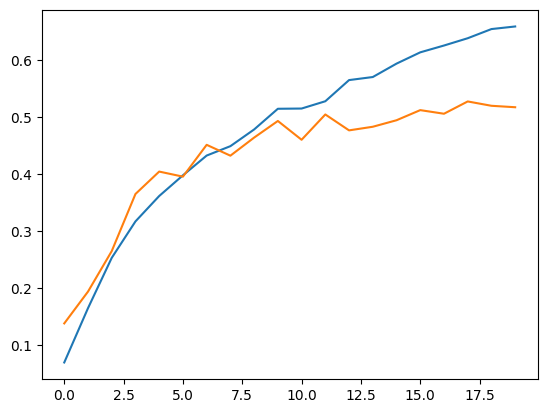

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

## Точность на тесте

In [10]:
def calculate_accuracy(true_labels, predictions):
    accuracy = tf.keras.metrics.Accuracy()
    accuracy.update_state(true_labels, predictions)
    return accuracy.result().numpy()

n_batches = len(test_flow)

max_flow = list(np.argmax(test_flow[i][1], axis = 1) for i in range(n_batches))
test_labels = np.concatenate(max_flow)

predictions = np.argmax(model.predict(test_flow, steps = n_batches), axis=1)

calculate_accuracy(test_labels, predictions)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


0.5177665

## Бинарная точность на тесте

In [11]:
binary_test_labels = test_labels.copy()
cnt_classes = classesNum // 2
binary_test_labels[binary_test_labels < cnt_classes] = 0
binary_test_labels[binary_test_labels >= cnt_classes] = 1

binary_predictions = predictions.copy()
binary_predictions[binary_predictions < cnt_classes] = 0
binary_predictions[binary_predictions >= cnt_classes] = 1


m = tf.keras.metrics.Accuracy()
m.update_state(binary_test_labels, binary_predictions)
m.result().numpy()

0.8147208

## Confusion Matrix

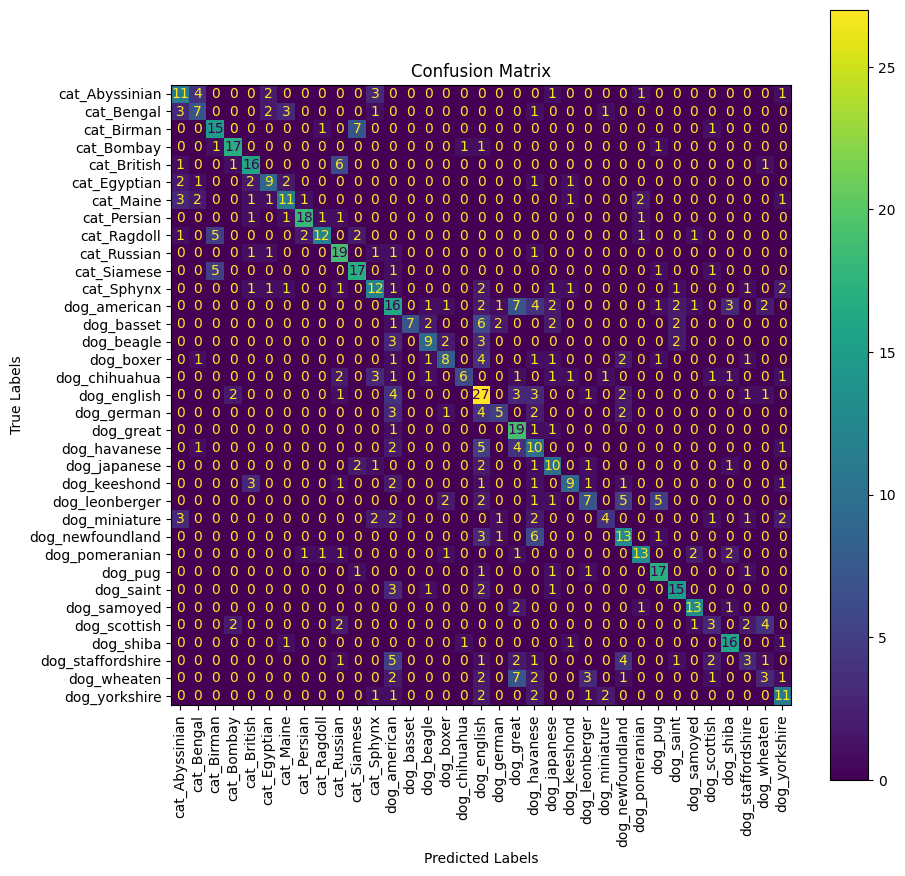

In [13]:
confmatrix = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confmatrix, display_labels=lablesNames)

fig, ax = plt.subplots(figsize=(10, 10))

disp.plot(ax=ax, xticks_rotation='vertical')

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

plt.show()

## Top3

In [14]:
predicted_proba_distribution = model.predict(test_flow, steps=n_batches)

true_labels = np.concatenate([test_flow[i][1] for i in range(n_batches)])

top3 = tf.keras.metrics.TopKCategoricalAccuracy(k=3)

top3.update_state(true_labels, predicted_proba_distribution)

top3_result = top3.result().numpy()

print(f"Top-3 Categorical Accuracy: {top3_result:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Top-3 Categorical Accuracy: 0.7690
